In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = "Clock strikes upon the hour \n And the sun begins to fade \n Still enough time to figure out \n How to chase my blues away \n I've done alright up to now \n It's the light of day that shows me how And when the night falls, loneliness calls \n Oh, I wanna dance with somebody \n I wanna \nfeel the heat with somebody\n Yeah, I wanna dance with somebody\n With somebody who loves me\n Oh, I wanna dance with somebody\n I wanna feel the heat with somebody\n Yeah, I wanna dance with somebody\n With somebody who loves me\n I've been in love and lost my senses\n Spinning through the town\n Sooner or later, the fever ends \n And I wind up feeling down \n I need a man who'll take a chance \n On a love that burns hot enough to last \n So when the night falls \n My lonely heart calls \n Oh, I wanna dance with somebody \n I wanna feel the heat with somebody \n Yeah, I wanna dance with somebody \n With somebody who loves me \n Oh, I wanna dance with somebody \n I wanna feel the heat with somebody \n Yeah, I wanna dance with somebody \n With somebody who loves me \n Somebody oo Somebody oo \n Somebody who loves me yeah \n Somebody oo Somebody oo \n To hold me in his arms oh \n I need a man who'll take a chance \n On a love that burns hot enough to last \n So when the night falls \n My lonely heart calls \n Oh, I wanna dance with somebody \n I wanna feel the heat with somebody \n Yeah, I wanna dance with somebody \n With somebody who loves me \n Oh, I wanna dance with somebody \n I wanna feel the heat with somebody \n Yeah, I wanna dance with somebody \n With somebody who loves me \n Don'tcha wanna dance with me baby \n Dontcha wanna dance with me boy \n Hey Don'tcha wanna dance with me baby \n With somebody who loves me \n Don'tcha wanna dance say you wanna dance \n Don'tcha wanna dance \n Don'tcha wanna dance say you wanna dance \n Don'tcha wanna dance \n Don'tcha wanna dance say you wanna dance \n With somebody who loves me \n"
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'somebody': 1, 'wanna': 2, 'with': 3, 'dance': 4, 'i': 5, 'the': 6, 'me': 7, 'who': 8, 'loves': 9, 'to': 10, 'oh': 11, 'yeah': 12, "don'tcha": 13, 'feel': 14, 'heat': 15, 'a': 16, 'and': 17, 'my': 18, 'oo': 19, 'enough': 20, 'that': 21, 'when': 22, 'night': 23, 'falls': 24, 'calls': 25, 'love': 26, 'say': 27, 'you': 28, 'how': 29, "i've": 30, 'up': 31, 'in': 32, 'need': 33, 'man': 34, "who'll": 35, 'take': 36, 'chance': 37, 'on': 38, 'burns': 39, 'hot': 40, 'last': 41, 'so': 42, 'lonely': 43, 'heart': 44, 'baby': 45, 'clock': 46, 'strikes': 47, 'upon': 48, 'hour': 49, 'sun': 50, 'begins': 51, 'fade': 52, 'still': 53, 'time': 54, 'figure': 55, 'out': 56, 'chase': 57, 'blues': 58, 'away': 59, 'done': 60, 'alright': 61, 'now': 62, "it's": 63, 'light': 64, 'of': 65, 'day': 66, 'shows': 67, 'loneliness': 68, 'been': 69, 'lost': 70, 'senses': 71, 'spinning': 72, 'through': 73, 'town': 74, 'sooner': 75, 'or': 76, 'later': 77, 'fever': 78, 'ends': 79, 'wind': 80, 'feeling': 81, 'down': 82, 'h

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['clock'])
print(tokenizer.word_index['strikes'])
print(tokenizer.word_index['upon'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['hour'])


46
47
48
6
49


In [6]:
print(xs[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  6]


In [7]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  6]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'somebody': 1, 'wanna': 2, 'with': 3, 'dance': 4, 'i': 5, 'the': 6, 'me': 7, 'who': 8, 'loves': 9, 'to': 10, 'oh': 11, 'yeah': 12, "don'tcha": 13, 'feel': 14, 'heat': 15, 'a': 16, 'and': 17, 'my': 18, 'oo': 19, 'enough': 20, 'that': 21, 'when': 22, 'night': 23, 'falls': 24, 'calls': 25, 'love': 26, 'say': 27, 'you': 28, 'how': 29, "i've": 30, 'up': 31, 'in': 32, 'need': 33, 'man': 34, "who'll": 35, 'take': 36, 'chance': 37, 'on': 38, 'burns': 39, 'hot': 40, 'last': 41, 'so': 42, 'lonely': 43, 'heart': 44, 'baby': 45, 'clock': 46, 'strikes': 47, 'upon': 48, 'hour': 49, 'sun': 50, 'begins': 51, 'fade': 52, 'still': 53, 'time': 54, 'figure': 55, 'out': 56, 'chase': 57, 'blues': 58, 'away': 59, 'done': 60, 'alright': 61, 'now': 62, "it's": 63, 'light': 64, 'of': 65, 'day': 66, 'shows': 67, 'loneliness': 68, 'been': 69, 'lost': 70, 'senses': 71, 'spinning': 72, 'through': 73, 'town': 74, 'sooner': 75, 'or': 76, 'later': 77, 'fever': 78, 'ends': 79, 'wind': 80, 'feeling': 81, 'down': 82, 'h

In [10]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
9/9 [==============================] - 0s 9ms/step - loss: 4.4789 - accuracy: 0.0352
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 4.4348 - accuracy: 0.0986
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 4.3594 - accuracy: 0.0986
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 4.2153 - accuracy: 0.1162
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 3.9792 - accuracy: 0.1585
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 3.7784 - accuracy: 0.1655
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 3.6748 - accuracy: 0.0986
Epoch 8/500
9/9 [==============================] - 0s 8ms/step - loss: 3.6225 - accuracy: 0.1444
Epoch 9/500
9/9 [==============================] - 0s 8ms/step - loss: 3.5834 - accuracy: 0.1901
Epoch 10/500
9/9 [==============================] - 0s 8ms/step - loss: 3.5441 - accuracy: 0.1725
Epoch 11/500
9/9 [===========

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

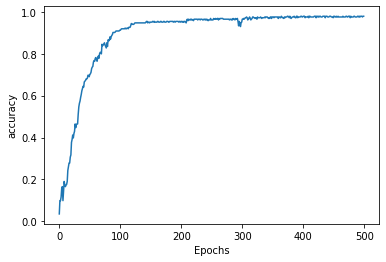

In [12]:
plot_graphs(history, 'accuracy')


In [16]:
seed_text = "i wanna dance"
next_words = 40
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

i wanna dance with somebody who loves me how and lonely when the night falls loneliness calls calls hour ends ends ends ends ends ends night falls loneliness calls when the night falls loneliness calls fever ends ends ends ends ends ends ends
